In [1]:
using CairoMakie
using DataFrames
using CSV
using FFTW,DSP
using HDF5

# Routine definitions & setup

In [2]:
function applyhanning(x::Vector) 
    # if iseven(length(x))
    #     pushfirst!(x,x[1])
    # end
    return x .* hanning(length(x))
end

applyhanning (generic function with 1 method)

# Load data

In [3]:
path = "/misc/rz_cloud/richter/how09898/phd/data/preliminary_data.hdf5"
file = h5open(path,"r")

🗂️ HDF5.File: (read-only) /misc/rz_cloud/richter/how09898/phd/data/preliminary_data.hdf5
├─ 📂 zeta=0.11601553017399716_M=0.1
│  ├─ 🔢 M
│  ├─ 🔢 dim
│  ├─ 📂 drivingfield
│  │  ├─ 🔢 ax
│  │  ├─ 🔢 ay
│  │  ├─ 🔢 fx
│  │  └─ 🔢 fy
│  ├─ 🔢 id
│  ├─ 📂 liouvillian
│  │  ├─ 📂 hamiltonian
│  │  │  └─ 🔢 m
│  │  ├─ 🔢 t1
│  │  └─ 🔢 t2
│  ├─ 📂 numericalparams
│  │  ├─ 🔢 atol
│  │  ├─ 🔢 dkx
│  │  ├─ 🔢 dky
│  │  ├─ 🔢 dt
│  │  ├─ 🔢 kxmax
│  │  ├─ 🔢 kxsamples
│  │  ├─ 🔢 kymax
│  │  ├─ 🔢 kysamples
│  │  ├─ 🔢 rtol
│  │  ├─ 🔢 t0
│  │  └─ 🔢 tsamples
│  ├─ 📂 observables
│  │  ├─ 📂 occupation
│  │  │  └─ 🔢 cbocc
│  │  └─ 📂 velocity
│  │     ├─ 🔢 vx
│  │     ├─ 🔢 vxinter
│  │     ├─ 🔢 vxintra
│  │     ├─ 🔢 vy
│  │     ├─ 🔢 vyinter
│  │     └─ 🔢 vyintra
│  ├─ 📂 unitscaling
│  │  ├─ 🔢 lengthscale
│  │  └─ 🔢 timescale
│  └─ 🔢 zeta
├─ 📂 zeta=0.11601553017399716_M=0.11601553017399716
│  ├─ 🔢 M
│  ├─ 🔢 dim
│  ├─ 📂 drivingfield
│  │  ├─ 🔢 ax
│  │  ├─ 🔢 ay
│  │  ├─ 🔢 fx
│  │  └─ 🔢 fy
│  ├─ 🔢 id
│  ├─ 📂 liouvillian
│  │ 

In [4]:
ms      = [read(file[k],"M") for k in keys(file)]
zetas   = [read(file[k],"zeta") for k in keys(file)]
vxs     = [read(file[k]["observables/velocity"],"vx") for k in keys(file)]
vxras   = [read(file[k]["observables/velocity"],"vxintra") for k in keys(file)]
vxers   = [read(file[k]["observables/velocity"],"vxinter") for k in keys(file)]
ts      = [read(file[k]["numericalparams"],"tsamples") for k in keys(file)]

1024-element Vector{Vector{Float64}}:
 [-7.5, -7.49921875, -7.4984375, -7.49765625, -7.496875, -7.49609375, -7.4953125, -7.49453125, -7.49375, -7.49296875  …  7.49296875, 7.49375, 7.49453125, 7.4953125, 7.49609375, 7.496875, 7.49765625, 7.4984375, 7.49921875, 7.5]
 [-7.5, -7.49921875, -7.4984375, -7.49765625, -7.496875, -7.49609375, -7.4953125, -7.49453125, -7.49375, -7.49296875  …  7.49296875, 7.49375, 7.49453125, 7.4953125, 7.49609375, 7.496875, 7.49765625, 7.4984375, 7.49921875, 7.5]
 [-7.5, -7.49921875, -7.4984375, -7.49765625, -7.496875, -7.49609375, -7.4953125, -7.49453125, -7.49375, -7.49296875  …  7.49296875, 7.49375, 7.49453125, 7.4953125, 7.49609375, 7.496875, 7.49765625, 7.4984375, 7.49921875, 7.5]
 [-7.5, -7.49921875, -7.4984375, -7.49765625, -7.496875, -7.49609375, -7.4953125, -7.49453125, -7.49375, -7.49296875  …  7.49296875, 7.49375, 7.49453125, 7.4953125, 7.49609375, 7.496875, 7.49765625, 7.4984375, 7.49921875, 7.5]
 [-7.5, -7.49921875, -7.4984375, -7.49765625, -7.49687

# Look at some velocities

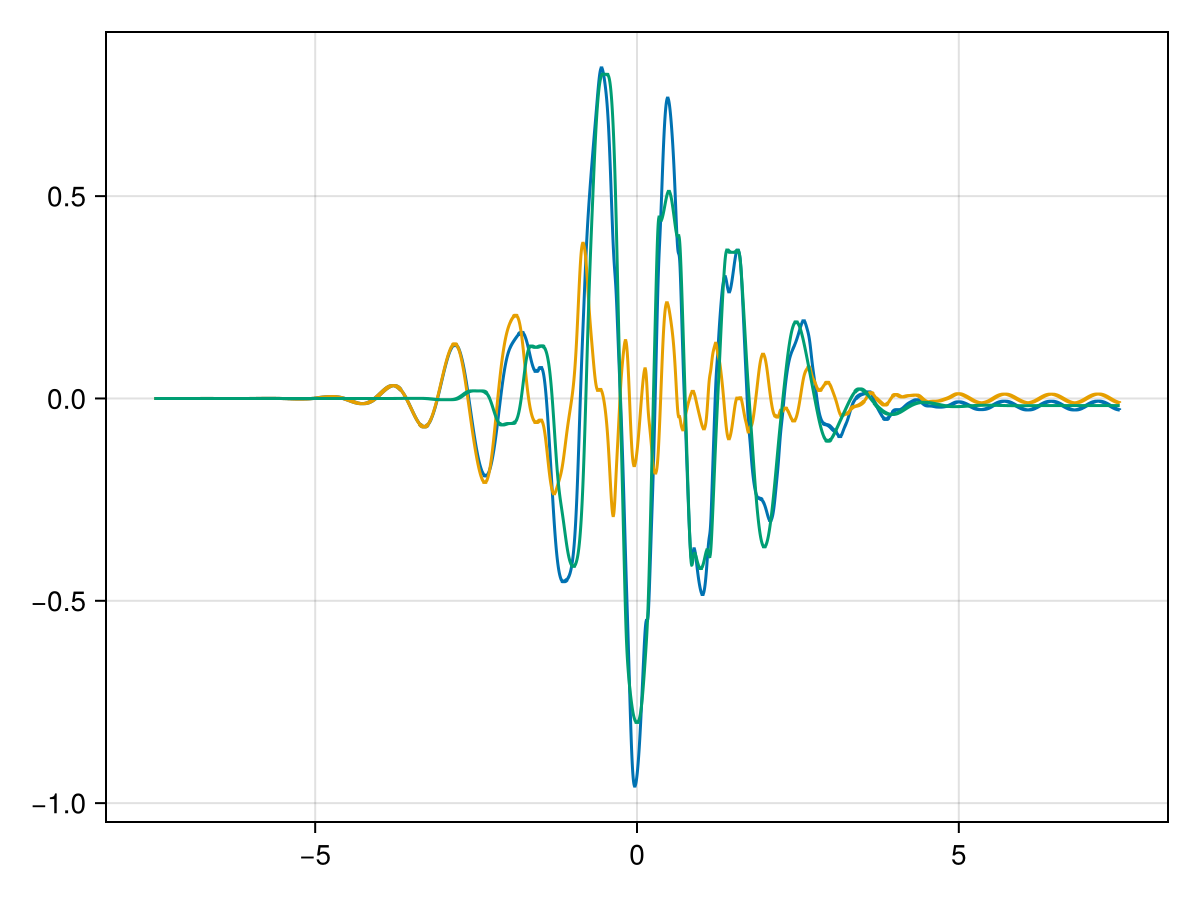

In [16]:
fig,ax,pl = lines(ts[722],vxs[722])
lines!(ax,ts[722],vxers[722])
lines!(ax,ts[722],vxras[722])
fig

# Do FFT of data

In [295]:
dnu = [sum(diff(f)) / length(f) for f in freqs]

1024-element Vector{Float64}:
 0.06665972294552652
 0.06665972294552652
 0.06665972294552652
 0.06665972294552652
 0.06665972294552652
 0.06665972294552652
 0.06665972294552652
 0.06665972294552652
 0.06665972294552652
 0.06665972294552652
 ⋮
 0.06666623264171458
 0.06666623264171458
 0.06666623264171458
 0.06666623264171458
 0.06666623264171458
 0.06666623264171458
 0.06666623264171458
 0.06666623264171458
 0.06666623264171458

In [305]:
Int(div(1.5,dnu[1]))

22

In [296]:
fftvx = rfft.(applyhanning.(vxs));
fftvxer = rfft.(applyhanning.(vxers));
fftvxra  = rfft.(applyhanning.(vxras));
freqs = [periodogram(vx;fs=1/dt).freq for (vx,dt) in zip(vxs,dtdata)];
freqs = [rfftfreq(length(vx),1/dt) for (vx,dt) in zip(vxs,dtdata)];

In [465]:
# Function to create a Gaussian kernel
function gaussian_kernel(size::Int, sigma::Float64)
    x = -div(size, 2):div(size, 2)
    kernel = exp.(-(x .^ 2) / (2 * sigma ^ 2))
    return kernel / sum(kernel)  # Normalize the kernel
end

# Function to pad the input signal with edge values
function pad_with_edge_values(x::Vector{<:Real}, pad_size::Int)
    left_pad = fill(x[1], pad_size)
    right_pad = fill(x[end], pad_size)
    return vcat(left_pad, x, right_pad)
end

# Function to apply Gaussian smoothing using FFT with edge value padding
function gaussian_smoothing_fft(x::Vector{<:Real}, sigma::Real)
    n = length(x)
    # Define the size of the kernel; typically we use 6 times sigma to capture most of the Gaussian curve
    kernel_size = min(n, max(1, 6 * sigma |> round |> Int))
    if kernel_size % 2 == 0  # Ensure the kernel size is odd
        kernel_size += 1
    end

    # Create Gaussian kernel
    kernel = gaussian_kernel(kernel_size, sigma)

    # Calculate the padding size
    pad_size = div(kernel_size, 2)

    # Pad the input signal with edge values
    x_padded = pad_with_edge_values(x, pad_size)

    # Pad the signal and kernel to the next power of 2 for efficient FFT
    padded_size = nextpow(2, length(x_padded) + kernel_size - 1)
    x_padded = vcat(x_padded, zeros(padded_size - length(x_padded)))
    kernel_padded = vcat(kernel, zeros(padded_size - kernel_size))
    
    # Perform FFT
    X = rfft(x_padded)
    K = rfft(kernel_padded)
    
    # Convolution in frequency domain
    Y = X .* K
    
    # Inverse FFT to get the convolution result
    y_padded = irfft(Y, padded_size)
    
    # Trim the result to match the original signal length, excluding the padding
    y = y_padded[pad_size + 1:pad_size + n]
    
    return y
end

gaussian_smoothing_fft (generic function with 2 methods)

In [631]:
function noiselimit(curve::Vector{<:Real},limit::Real=1e-10,smoothing_sigma::Real=3.0)
    smoothed = gaussian_smoothing_fft(curve,smoothing_sigma)
    smoothed /= maximum(smoothed)
    i = 100
    n = length(smoothed)
    while smoothed[i] > limit && i < n
        i += 1
    end
    return i
end
function noiselimit(curves::Vector{<:Vector{<:Real}},limit::Real=1e-12,smoothing_sigma::Real=3.0)
    return minimum([noiselimit(c,limit,smoothing_sigma) for c in curves])
end

noiselimit (generic function with 6 methods)

In [632]:
noiselimit(abs2.(fftvx[333]))

187

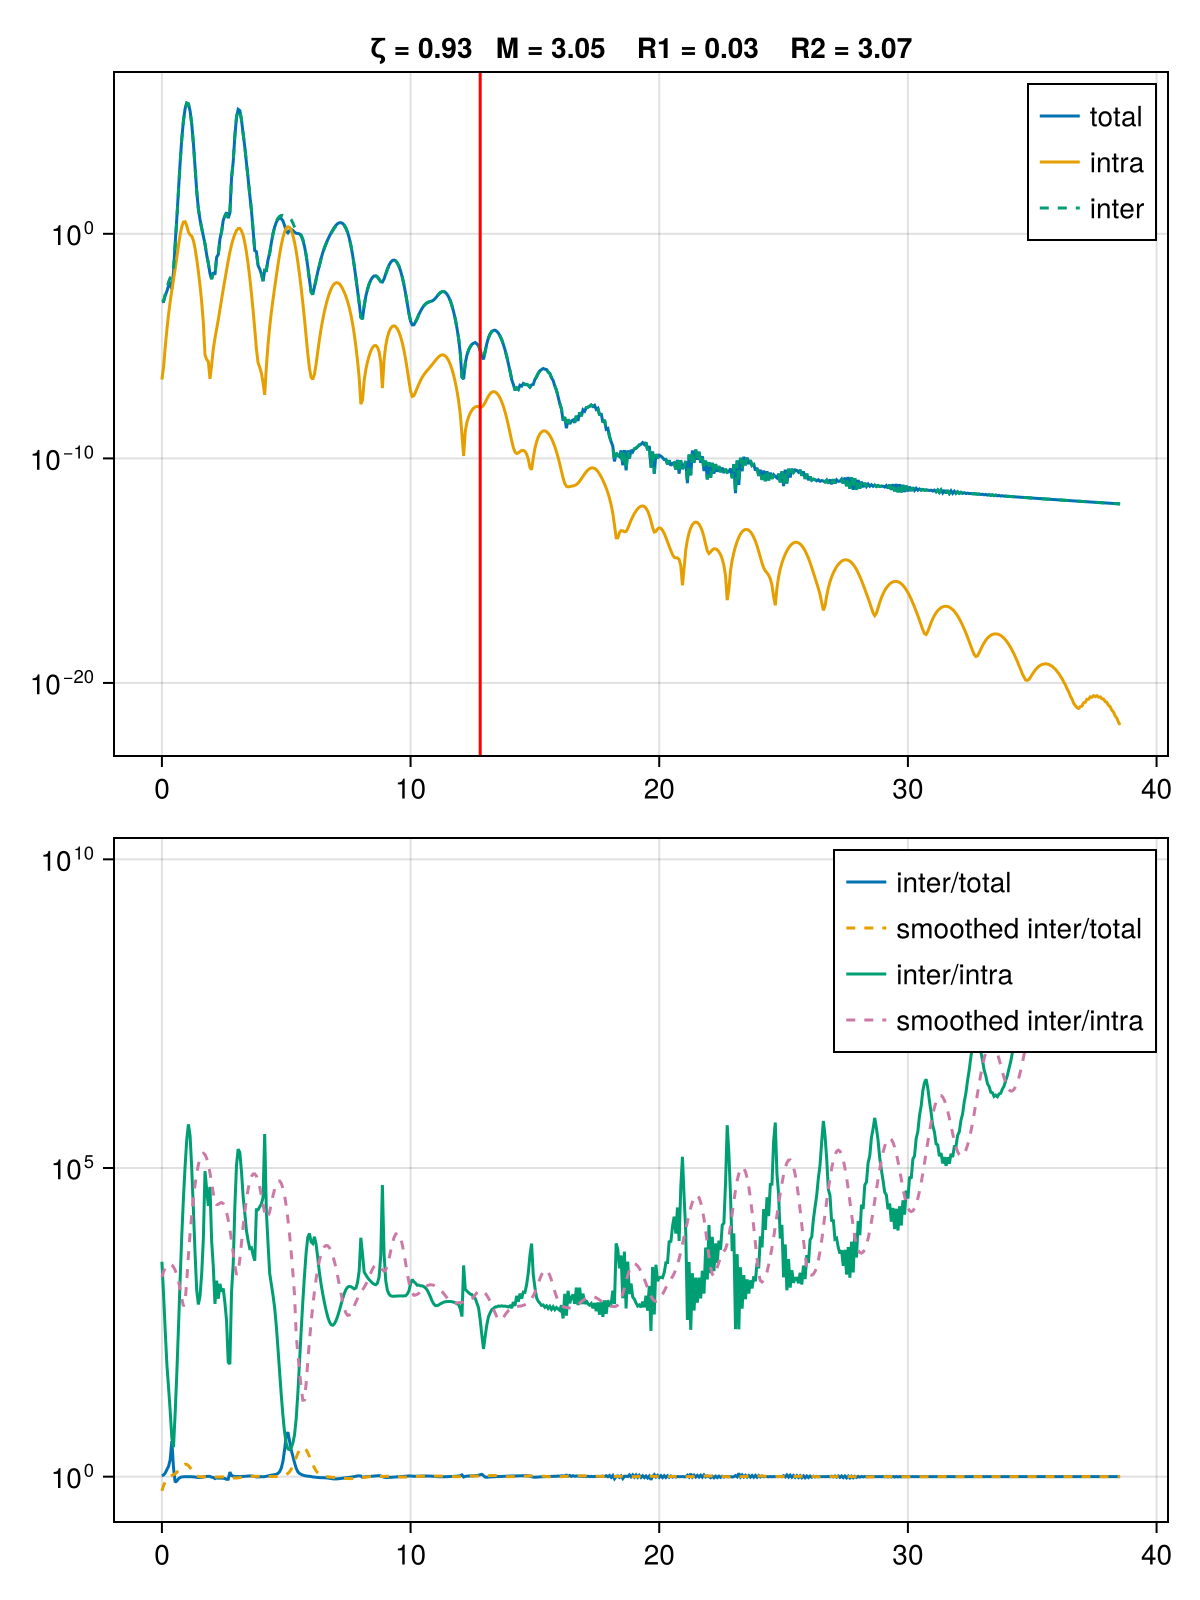

In [708]:
avg(x::Vector{<:Real}) = sum(x) / length(x)

function plot(index::Integer;
    limit::Real=1e-10,
    maxharm::Union{Real,Nothing}=nothing,
    smoothing_sigma::Real=3.0,
    outpath::Union{String,Nothing}=nothing)

    # j = freqs[index] .< maxharm
    data = [abs2.(fftvx[index]),abs2.(fftvxer[index]),abs2.(fftvxra[index])]
    maxindex = isnothing(maxharm) ? noiselimit(data,limit,smoothing_sigma) : maxharm
    j = 1:minimum((3maxindex,length(fftvx[index])))

    fre = freqs[index][j]
    r1 = abs2.(fftvxer[index][j]) ./ abs2.(fftvx[index][j])
    r2 = abs2.(fftvxer[index][j]) ./ abs2.(fftvxra[index][j])

    R1 = avg(log10.(r1[1:maxindex]))
    R2 = avg(log10.(r2[1:maxindex]))

    title = "ζ = $(round(zetas[index],digits=2))   M = $(round(ms[index],digits=2))"
    title *= "    R1 = $(round(R1,digits=2))    R2 = $(round(R2,digits=2))"

    fig = Figure(size = (600,800))
    ax = Axis(fig[1,1],yscale=log10,title=title)
    lines!(ax,fre,abs2.(fftvx[index][j]),label="total")
    lines!(ax,fre,abs2.(fftvxra[index][j]),label="intra")
    lines!(ax,fre,abs2.(fftvxer[index][j]),label="inter",linestyle=:dash)

    vlines!(ax,[fre[maxindex]],color=:red)
    axislegend(ax)
    
    ax2 = Axis(fig[2,1],yscale=log10)

    lines!(ax2,fre,r1,label="inter/total")
    lines!(ax2,fre,gaussian_smoothing_fft(r1,smoothing_sigma),label="smoothed inter/total",linestyle=:dash)
    lines!(ax2,fre,r2,label="inter/intra")
    lines!(ax2,fre,gaussian_smoothing_fft(r2,smoothing_sigma),label="smoothed inter/intra",linestyle=:dash)
    axislegend(ax2)

    if !isnothing(outpath)
        mkpath(dirname(outpath))
        CairoMakie.save(outpath,fig)
    end

    return fig
end

plot(rand(1:length(vxs)))


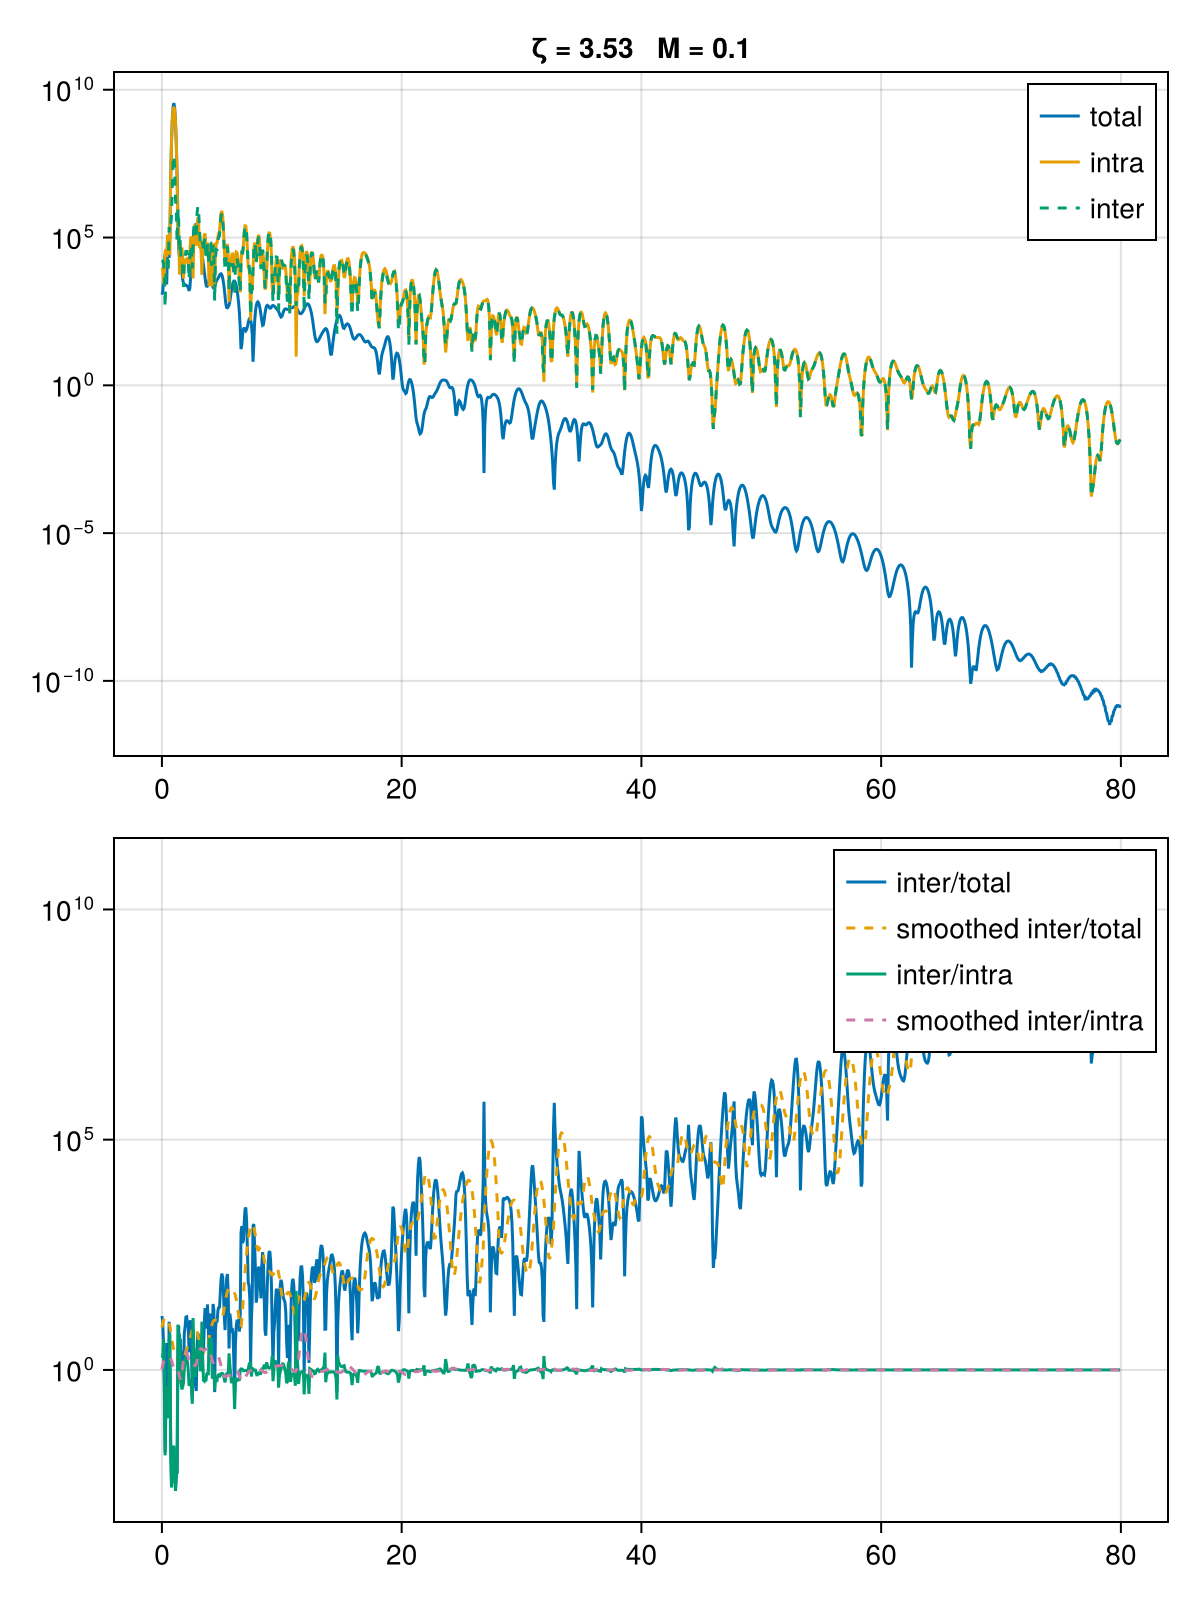

In [705]:
i = collect(1:1024)[ms .== 0.1 .&& zetas .== 3.5349811050301057]
plot(i[1],80)

In [695]:
for i in 1:1024
    plot(i;outpath="preliminary_spectra/zeta=$(zetas[i])_M=$(ms[i]).png")
end


In [696]:
max_idxs = [noiselimit([abs2.(a),abs2.(b),abs2.(c)]) for (a,b,c) in zip(fftvx,fftvxer,fftvxra)]
r1s = [avg(log10.(abs2.(er) ./ abs2.(tot))[1:k]) for (er,tot,k) in zip(fftvxer,fftvx,max_idxs)]
r2s = [avg(log10.(abs2.(er) ./ abs2.(ra))[1:k]) for (er,ra,k) in zip(fftvxer,fftvxra,max_idxs)]

1024-element Vector{Float64}:
 0.2079071458510836
 0.21986907885186274
 0.38968589021256794
 0.5428186101748453
 0.6674434194651581
 0.8612443732046176
 1.0778016261709509
 1.2956081277564684
 1.5147166553033593
 1.8540273074705849
 ⋮
 0.7794158042556488
 0.9889636889971334
 1.5028053540745736
 1.9508485049199422
 2.812870042401707
 3.086631570360106
 3.256712121325351
 3.365672149436782
 3.3929597886618126

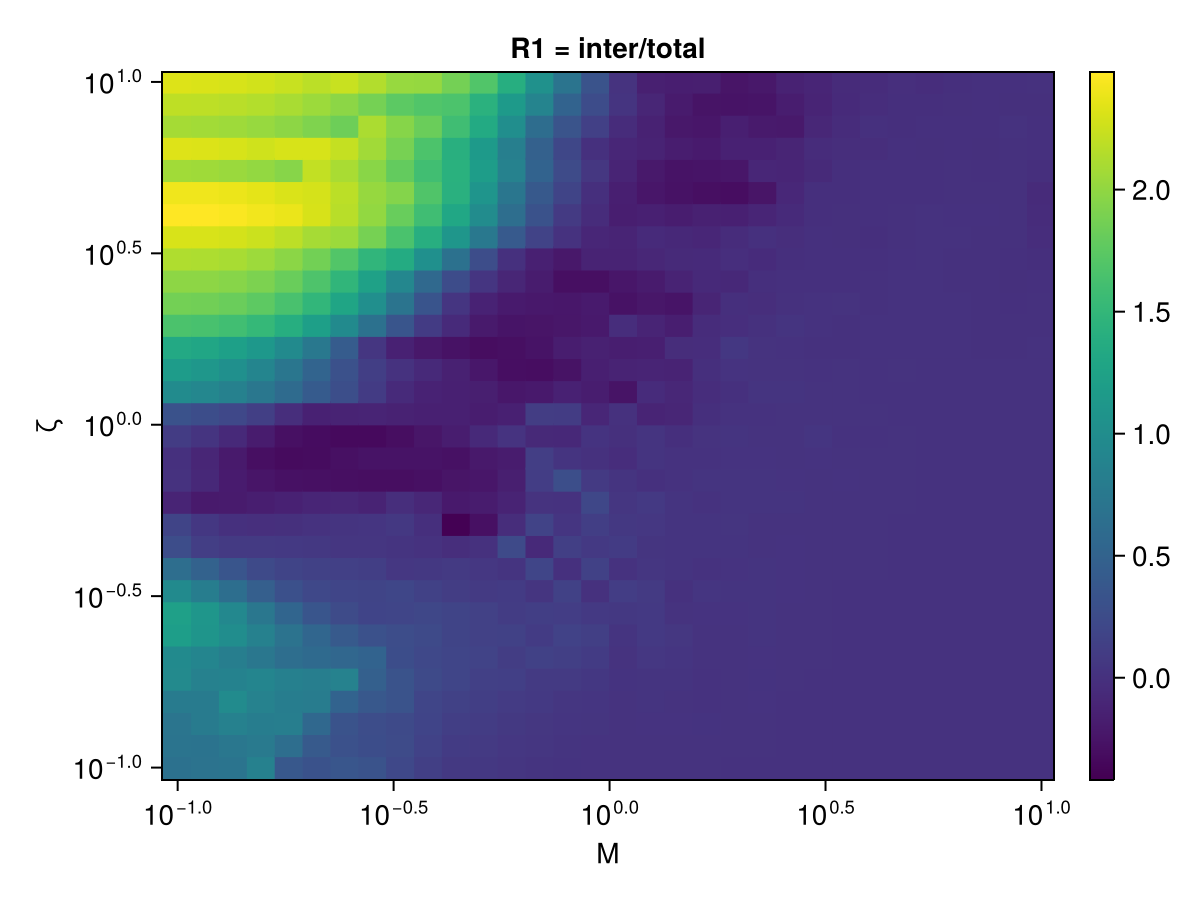

In [712]:
fig = Figure()
ax1 = Axis(fig[1,1],xscale=log10,yscale=log10,xlabel="M",ylabel="ζ",title="R1 = inter/total")
hm = heatmap!(ax1,ms,zetas,r1s,colormap=:viridis)
Colorbar(fig[:, end+1], hm)
fig

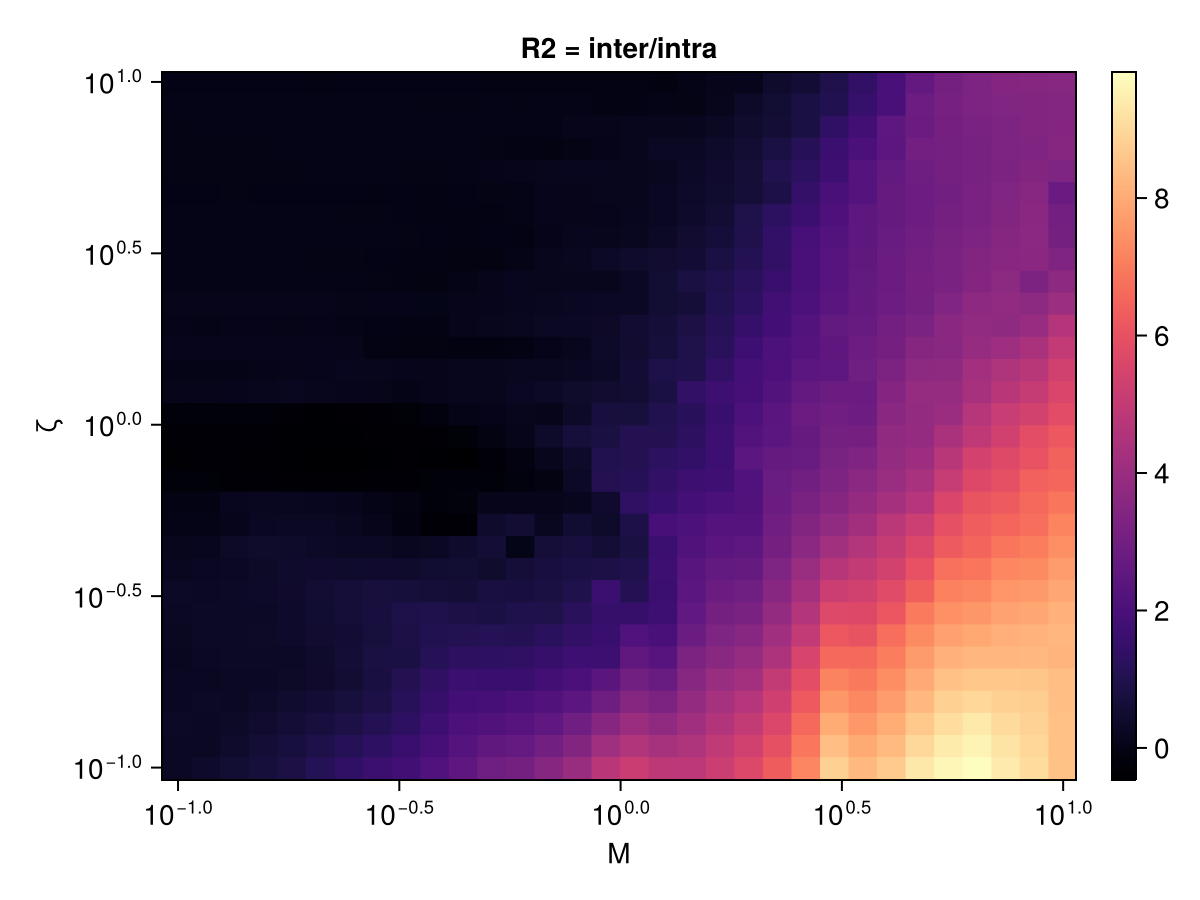

In [715]:
fig = Figure()
ax1 = Axis(fig[1,1],xscale=log10,yscale=log10,xlabel="M",ylabel="ζ",title="R2 = inter/intra")
hm = heatmap!(ax1,ms,zetas,r2s,colormap=:magma)
Colorbar(fig[:, end+1], hm)
fig